## Demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from config_manager import ConfigManager
from data_access import DataAccess

schema = ConfigManager.get_config('workloadConfig.schema')
table = ConfigManager.get_config('workloadConfig.table')

bikes = DataAccess().select_to_df(f"SELECT * FROM {schema}.{table}")

# TODO: move to university servers, run at scale

bikes

Connecting to the PostgreSQL database...
Connected to localhost:datasets.


,_id,bikeid,start_time,duration_minutes,start_station_name,end_station_name,start_latitude,start_longitude,end_latitude,end_longitude
0,615429,329,2014-10-11 13:12:00+03:00,22,Bullock Museum @ Congress & MLK,Capitol Station / Congress & 11th,30.28039,-97.73809,30.27260,-97.74127
1,615430,140,2015-08-08 19:12:00+03:00,12,Republic Square @ Guadalupe & 4th St.,Davis at Rainey Street,30.26774,-97.74692,30.26019,-97.73845
2,615431,220,2015-01-28 18:12:00+02:00,10,City Hall / Lavaca & 2nd,17th & Guadalupe,30.26476,-97.74678,30.27974,-97.74254
3,615432,445,2016-03-28 14:41:52+03:00,92,Rainey St @ Cummings,Rainey St @ Cummings,30.25579,-97.73982,30.25579,-97.73982
4,615433,894,2015-03-07 16:12:00+02:00,44,Rainey St @ Cummings,Rainey St @ Cummings,30.25579,-97.73982,30.25579,-97.73982
...,...,...,...,...,...,...,...,...,...,...
95,615524,523,2017-06-16 12:52:00+03:00,45,Pfluger Bridge @ W 2nd Street,Riverside @ S. Lamar,30.26717,-97.75484,30.26446,-97.75665
96,615525,696,2015-10-19 17:12:14+03:00,13,5th & Bowie,Rainey St @ Cummings,30.26960,-97.75332,30.25579,-97.73982
97,615526,685,2015-09-17 17:12:42+03:00,5,Barton Springs @ Kinney Ave,Zilker Park,30.26200,-97.76118,30.26590,-97.76822
98,615527,518,2016-03-18 15:00:21+02:00,8,Republic Square @ Guadalupe & 4th St.,Red River & 8th Street,30.26774,-97.74692,30.26854,-97.73646


In [3]:
from jaccard_workload_approximator import JaccardWorkloadApproximator

workload_approximator = JaccardWorkloadApproximator()
workload = workload_approximator.run(100)
results = workload_approximator.results

============ starting iteration 1   ============
Processing query:
SELECT _id FROM public.austin_bikes_100 WHERE end_station_name IN ('5th & Bowie' , 'East 6th & Pedernales St.' , 'Plaza Saltillo' , 'Red River & 8th Street' , 'Barton Springs @ Kinney Ave' , '5th & San Marcos' , '11th & San Jacinto' , '8th & Congress' , 'South Congress & James' , 'Trinity & 6th Street' , 'Nueces @ 3rd') AND end_longitude BETWEEN -97.74507382404202 AND -97.7186885902296
Processing query:
SELECT _id FROM public.austin_bikes_100 WHERE bikeid BETWEEN 2075.025654711556 AND 2144.6591055692943 AND start_latitude BETWEEN 30.257910938930756 AND 30.27291883840926 AND duration_minutes BETWEEN 162.51826135401885 AND 318.40750333077654
Processing query:
SELECT _id FROM public.austin_bikes_100 WHERE start_longitude BETWEEN -97.74651487110786 AND -97.74132658317957
Processing query:
SELECT _id FROM public.austin_bikes_100 WHERE start_longitude BETWEEN -97.7187823593802 AND -97.7168478493484
Processing query:
SELECT _i

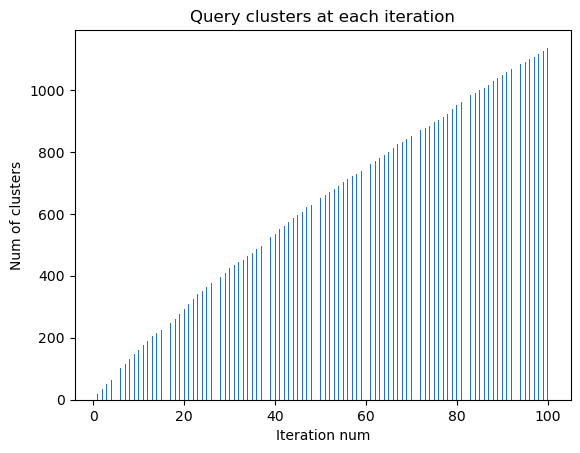

In [6]:
import matplotlib.pyplot as plt

numOfClusters = [{'iter': (i+1) , 'clusters_num': len(results[i])} for i in range(len(results))]

iters = [res['iter'] for res in numOfClusters]
clustersNum = [res['clusters_num'] for res in numOfClusters]

plt.bar(iters, clustersNum, 0.2)

plt.xlabel("Iteration num")
plt.ylabel("Num of clusters")
plt.title("Query clusters at each iteration")
plt.show()

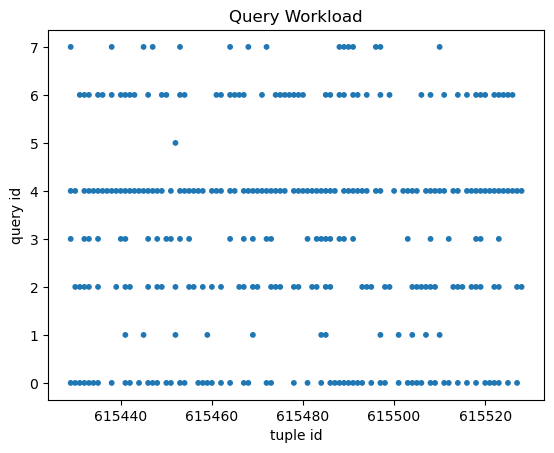

In [57]:
import matplotlib.pyplot as plt

DEFAULT_DOT_SIZE = 10

flat = lambda l: [item for sublist in l for item in sublist]
y = flat([[i] * len(workload[i]['result']) for i in range(len(workload))])
x = flat([workload[i]['result'] for i in range(len(workload))])
sizes = flat([[DEFAULT_DOT_SIZE * workload[i]['frequency']] * len(workload[i]['result']) for i in range(len(workload))])

# TODO add different color to tuples in sample
# TODO sample queries for figure instead of everything

plt.scatter(x, y, s=sizes)
plt.title("Query Workload")
plt.xlabel("tuple id")
plt.ylabel("query id")
plt.show()

In [38]:
from saqp_manager import SaqpManager

k = 20
saqp_manager = SaqpManager([query['result'] for query in workload], [query['frequency'] for query in workload], k)
sample = saqp_manager.get_sample()

Start running LazyGreedy with type UC
============ starting iteration 1   ============
Updated S, new gain: 183.6836948088430654020864805
iteration took: 394.04 ms
============ starting iteration 2   ============
Updated S, new gain: 192.1714665490769079001547152
iteration took: 887.45 ms
============ starting iteration 3   ============
Updated S, new gain: 199.4388611471132680624551677
iteration took: 85.66 ms
============ starting iteration 4   ============
Updated S, new gain: 204.5783925895568476003601910
iteration took: 542.14 ms
============ starting iteration 5   ============
Updated S, new gain: 209.4413802070235187210579616
iteration took: 165.58 ms
============ starting iteration 6   ============
Updated S, new gain: 213.0050394196418669008961280
iteration took: 929.87 ms
============ starting iteration 7   ============
Updated S, new gain: 216.4678928131970734684069378
iteration took: 235.71 ms
============ starting iteration 8   ============
Updated S, new gain: 219.4438118

In [39]:
df = pd.DataFrame(sample)
df

,_id,bikeid,start_time,duration_minutes,start_station_name,end_station_name,start_latitude,start_longitude,end_latitude,end_longitude
0,615446,373,2016-06-12 18:38:54+03:00,13,Convention Center / 4th St. @ MetroRail,Davis at Rainey Street,30.26483,-97.73900,30.26019,-97.73845
1,615464,352,2014-07-18 08:12:00+03:00,29,Capitol Station / Congress & 11th,Capitol Station / Congress & 11th,30.27260,-97.74127,30.27260,-97.74127
2,615485,712,2015-07-31 14:12:00+03:00,5,4th & Congress,5th & Bowie,30.26634,-97.74378,30.26960,-97.75332
3,615433,894,2015-03-07 16:12:00+02:00,44,Rainey St @ Cummings,Rainey St @ Cummings,30.25579,-97.73982,30.25579,-97.73982
4,615479,414,2016-05-18 18:31:43+03:00,3,Pfluger Bridge @ W 2nd Street,3rd & West,30.26717,-97.75484,30.26780,-97.75189
5,615442,263,2017-01-29 11:04:39+02:00,54,South Congress & Academy,South Congress & Barton Springs at the Austin ...,30.25226,-97.74854,30.25839,-97.74592
6,615523,966,2015-03-18 20:12:00+02:00,4,4th & Congress,Convention Center / 4th St. @ MetroRail,30.26634,-97.74378,30.26483,-97.73900
7,615448,893,2016-09-30 15:38:03+03:00,36,2nd & Congress,2nd & Congress,30.26408,-97.74355,30.26408,-97.74355
8,615498,95,2014-04-26 19:12:00+03:00,0,City Hall / Lavaca & 2nd,City Hall / Lavaca & 2nd,30.26476,-97.74678,30.26476,-97.74678
9,615461,646,2015-12-02 17:12:27+02:00,7,5th & Bowie,Palmer Auditorium,30.26960,-97.75332,30.25971,-97.75346


In [40]:
random_sample = DataAccess().select(f"SELECT * FROM {schema}.{table} ORDER BY RANDOM() LIMIT {saqp_manager.k}")
df2 = pd.DataFrame(random_sample)

In [103]:
import kmedoids
import numpy as np
from scipy.spatial.distance import pdist, squareform

population = saqp_manager.saqpParAdapter.get_population()
def np_dist(t1, t2):
    keys = [*population[0].keys()]
    t1_dict = {}
    t2_dict = {}
    for i in range(len(t1)):
        t1_dict[keys[i]] = t1[i]
        t2_dict[keys[i]] = t2[i]
    return saqp_manager.saqpParAdapter._tuple_weight(t1_dict) * saqp_manager.saqpParAdapter._dist(t1_dict, t2_dict)

T = np.array([[*d.values()] for d in saqp_manager.saqpParAdapter.get_population()])
distmatrix = squareform(pdist(T, np_dist))
km = kmedoids.fasterpam(distmatrix, saqp_manager.k)
kmedoids_sample = [population[i] for i in list(km.medoids)]
df3 = pd.DataFrame(kmedoids_sample)

In [115]:
score_func = saqp_manager.saqpParAdapter.get_gain_function()
print(f"Sample score for our sample: {score_func(sample)}")

numRandomTrials = 100
random_score = sum([score_func(DataAccess().select(f"SELECT * FROM {schema}.{table} ORDER BY RANDOM() LIMIT {saqp_manager.k}")) for i in range(numRandomTrials)]) / numRandomTrials

# TODO print min and max for random
# TODO change kmedoids by multiplying the points by their weight
# TODO add a graph showing sample scores w.r.t to k (sample size) (test queries or train queries?)
# TODO add graphs showing sample score (w.r.t to train and test) of our sample and runtime w.r.t to num of queries in train set (fixed sample size) - do this after KL


print(f"Sample score for random sample: {random_score}")
print(f"Sample score for kmedoids sample: {score_func(kmedoids_sample)}") # TODO: look at this more closely again
# TODO add random greedy that in each batch of queries chooses the x tuple with the most cumulative weight until S is full - DO THIS LATER

Sample score for our sample: 242.5677953743364799896524511
Sample score for random sample: 226.8852909126666352455863462
Sample score for kmedoids sample: 223.2018722924888683468750397


In [ ]:
# TODO partition queries to train-test

$$Score(q, S) = \sum_{t\in q(S)}{\bigg(\sum_{r\in Q}{w_r\cdot 1_{t\in r(T)}}\bigg)}$$

Intuitively, the score of a query execution result over a sample is the cumulative weight of all tuples retained in the sample from that query

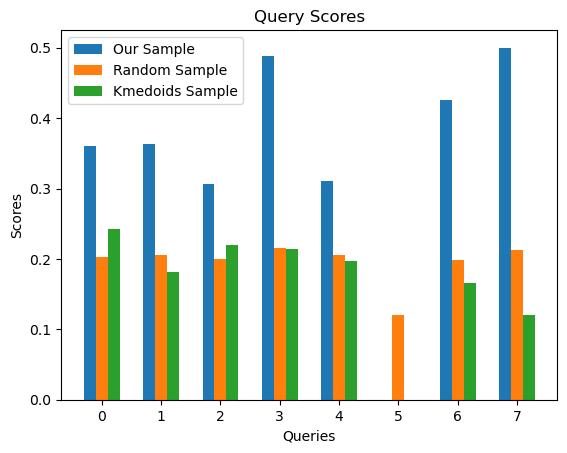

In [119]:
import pandasql as ps
import matplotlib.pyplot as plt

dataAccess = DataAccess()
queries = [q['sql'][0].replace("_id", "*") for q in workload]
x = [*range(len(queries))]

sampleY = []
randomY = []
kmedoidsY = []
for query in queries:
    sample_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "df"))
    kmedoids_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "df3"))

    sampleY += [saqp_manager.saqpParAdapter.query_result_score(sample_query_df.to_dict('records'),
                                                               dataAccess.select_to_df(query).to_dict('records'))]
    random_dfs = [DataAccess().select_to_df(f"SELECT * FROM {schema}.{table} ORDER BY RANDOM() LIMIT {saqp_manager.k}") for i in range(numRandomTrials)]
    random_scores = []
    for random_df in random_dfs:
        random_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "random_df"))
        random_scores += [saqp_manager.saqpParAdapter.query_result_score(random_query_df.to_dict('records'),
                                                               dataAccess.select_to_df(query).to_dict('records'))]
    randomY += [(sum(random_scores) / numRandomTrials)]
    kmedoidsY += [saqp_manager.saqpParAdapter.query_result_score(kmedoids_query_df.to_dict('records'),
                                                               dataAccess.select_to_df(query).to_dict('records'))]

plt.bar([t - 0.2 for t in x], sampleY, 0.2, label='Our Sample')
plt.bar([t for t in x], randomY, 0.2, label='Random Sample')
plt.bar([t + 0.2 for t in x], kmedoidsY, 0.2, label='K-medoids Sample')

plt.xlabel("Queries")
plt.ylabel("Scores")
plt.title("Query Scores")
plt.legend()
plt.show()

# TODO: new graphs - showing progress after each batch
# KL/Wasserstein of tuple weights after each batch (comparing each observed distribution to the next) - do this once with threshold=1 (union only when the same) and once with lower threshold
# A graph that shows the score of S at each new batch, score computed w.r.t to test queries (the same test after each batch)
# A graph that shows the score of S at each new batch, score computed w.r.t to the train queries (the same test after each batch)
# Graph showing number of clusters after each batch

In [ ]:
# TODO: test size should about 50

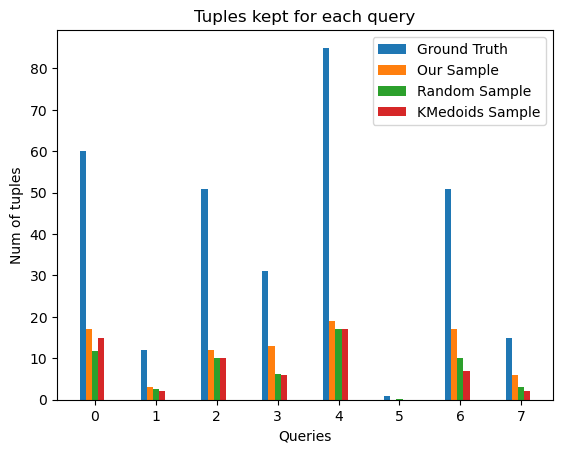

In [120]:
import pandasql as ps
import matplotlib.pyplot as plt

dataAccess = DataAccess()
queries = [q['sql'][0].replace("_id", "*") for q in workload]
x = [*range(len(queries))]

sampleY = []
randomY = []
kmedoidsY = []
truthY = []

# TODO: show num of tuples / 20 and change this to test set

for query in queries:
    sample_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "df"))
    kmedoids_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "df3"))
    truth_query_df = dataAccess.select_to_df(query)

    random_dfs = [DataAccess().select_to_df(f"SELECT * FROM {schema}.{table} ORDER BY RANDOM() LIMIT {saqp_manager.k}") for i in range(numRandomTrials)]
    random_scores = []
    for random_df in random_dfs:
        random_query_df = ps.sqldf(query.replace(f"{schema}.{table}", "random_df"))
        random_scores += [len(random_query_df)]

    randomY += [(sum(random_scores) / numRandomTrials)]
    sampleY += [len(sample_query_df.index)]
    kmedoidsY += [len(kmedoids_query_df.index)]
    truthY += [len(truth_query_df.index)]

plt.bar([t - 0.2 for t in x], truthY, 0.1, label='Ground Truth')
plt.bar([t - 0.1 for t in x], sampleY, 0.1, label='Our Sample')
plt.bar([t for t in x], randomY, 0.1, label='Random Sample')
plt.bar([t + 0.1 for t in x], kmedoidsY, 0.1, label='K-medoids Sample')

plt.xlabel("Queries")
plt.ylabel("Num of tuples")
plt.title("Tuples kept for each query")
plt.legend()
plt.show()